In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
dataset = pd.read_csv("emails.csv")


In [22]:
# input
x = dataset.iloc[:, [2, 3]].values

# output
y = dataset.iloc[:, 4].values


In [23]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)


In [24]:
from sklearn.preprocessing import StandardScaler
  
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
  
print (xtrain[0:10, :])

[[ 1.9271617   0.60399561]
 [ 1.30898893 -0.28953232]
 [-0.33947178 -0.28953232]
 [ 0.48475858 -0.28953232]
 [-0.13341419 -0.28953232]
 [ 0.99990255  2.87218191]
 [ 0.27870099 -0.15206649]
 [-0.33947178 -0.22079941]
 [ 0.89687375 -0.15206649]
 [-0.13341419 -0.22079941]]


In [25]:
from sklearn.linear_model import LogisticRegression
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

C:\Users\nepze\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [26]:
y_pred = classifier.predict(xtest)


In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[500  27   0 ...   0   0   0]
 [162  44   0 ...   0   0   0]
 [ 98  34   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [28]:
from sklearn.metrics import accuracy_score

print ("Accuracy : ", accuracy_score(ytest, y_pred))


Accuracy :  0.4323279195668987


C:\Users\nepze\AppData\Local\Temp\ipykernel_8884\369920054.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


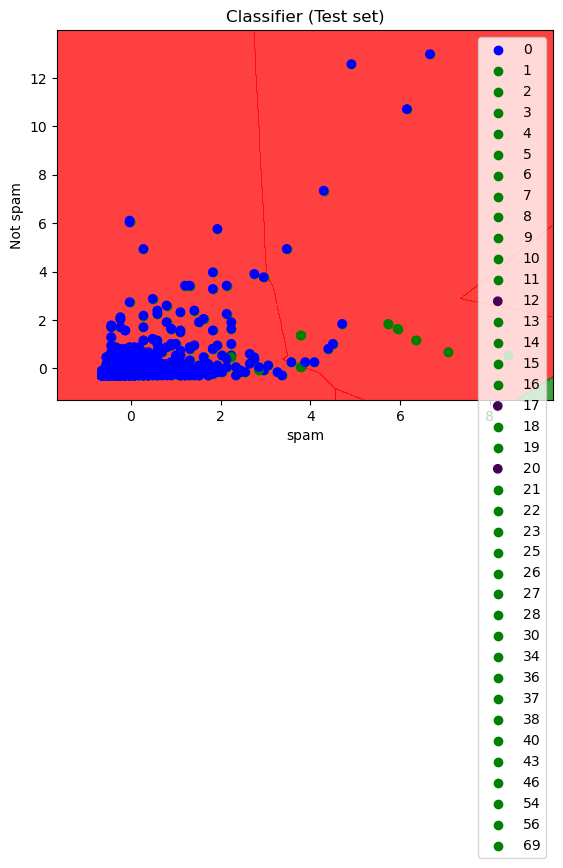

In [38]:
# from matplotlib.colors import ListedColormap

# X_set, y_set = xtest, ytest
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,stop = X_set[:, 0].max() + 1, step = 0.01),
# np.arange(start = X_set[:, 1].min() - 1,stop = X_set[:, 1].max() + 1, step = 0.01))

# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())

# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#         c = ListedColormap(('blue', 'green'))(i), label = j)
# plt.title('Spam Test')
# plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1])
# plt.xlabel('spam')
# plt.ylabel('Not spam')
# plt.legend()
# plt.show()
from matplotlib.colors import ListedColormap

x_set, y_set = xtest, ytest
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(x1, x2, classifier.predict(np.array([X1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j, 0],
        x_set[y_set == j, 1],
        c=ListedColormap(('blue', 'green'))(i),
        label=j
    )

plt.scatter(x_set[:, 0], x_set[:, 1], c=y_set, cmap=ListedColormap(('blue', 'green')))
plt.title('Classifier (Test set)')
plt.xlabel('spam')
plt.ylabel('Not spam')
plt.legend()
plt.show()
